In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lets read the data frame
# lets look at the initial few records to get an understanding
cycle = pd.read_csv("day.csv")
cycle.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Lets look at some more details about the data
cycle.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
# Lets get the size. It will be used in future to figure out if have missed some rows
cycle.shape

(730, 16)

In [5]:
# Lets identify the Column which has null value
# Lets get the data-types of the column too
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1. No Null values seen
2. dteday is of object type

**Data understanding, preparation and EDA**

weathersit, season, mnth, weekday can be converted into categorical columns. It will help us to perform EDA

In [6]:
# Based on the data dictionary following categories can be created.
# For weathersit
cycle.weathersit = cycle.weathersit.map({1:"Clear", 2:"Misty", 3:"Rainy", 4:"Extreme_Weather"})
#1:spring, 2:summer, 3:fall, 4:winter
cycle.season = cycle.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
# month and weekday are categorical. So it can be changed.
cycle.mnth = cycle.mnth.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

cycle.weekday = cycle.weekday.map({1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 0:"Sun"})

cycle.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


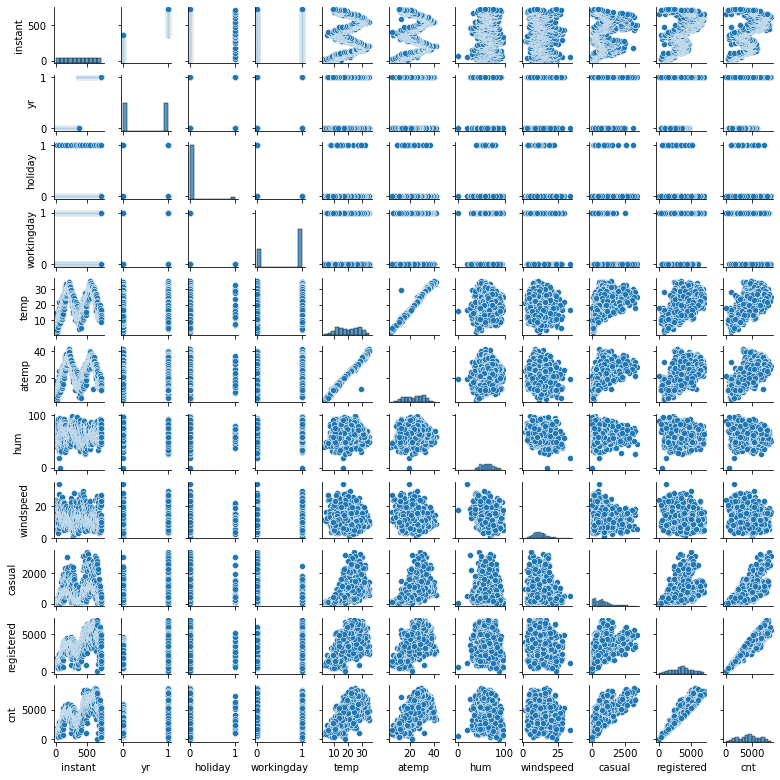

In [7]:
# Get the pair-plot to get an understanding on relation between independent and dependent variable
sns.pairplot(cycle, height=1)
plt.show()

In [8]:
#too many pair-plots so we can reduced the unwanted column
# dteday not needed as we already have year month and weekday
#df.drop(columns=['B', 'C'])

cycle.drop(columns = ["dteday"], axis = 1, inplace = True)

In [9]:
#remove instant column as it is just an index
cycle.drop(columns = ["instant"], axis = 1, inplace = True)

In [10]:
#remove 'casual', 'registered' column as we already have cnt
cycle.drop(columns = ["casual", 'registered'], axis = 1, inplace = True)

In [11]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


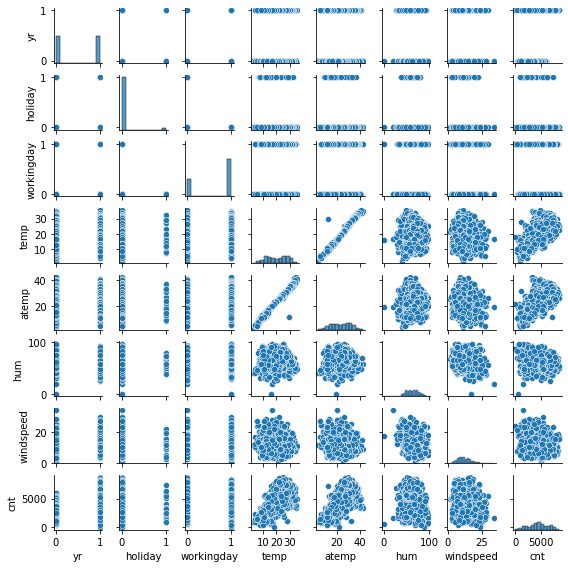

In [12]:
# Get the pair-plot to get an understanding on relation between independent and dependent variable
sns.pairplot(cycle, height=1)
plt.show()

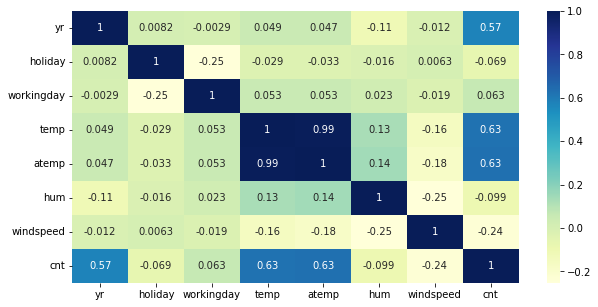

In [13]:
# We can reduce the number of variables further based on the correlation
heat_map = cycle.corr()

plt.figure(figsize=[10,5])
sns.heatmap(heat_map, cmap = 'YlGnBu', annot = True)
plt.show()

In [14]:
# temp and atemp has high correlation, so one can be dropped.
# Lets go with temp as actul temp will be useful in predicting the cnt more accurately
cycle.drop(columns = ["temp"], axis = 1, inplace = True)

In [15]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Lets Perform some EDA on the available variables. cnt is dependent variable to understand the demand ####

##### Lets start start preparing EDA for categorical values vs cnt #####


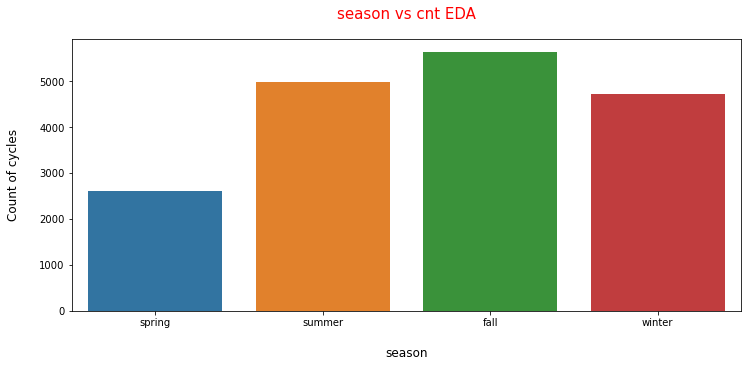

In [16]:
# season vs cnt barplot , understand the trend
plt.figure(figsize=[12,5])
sns.barplot(x = cycle["season"], y = cycle["cnt"], ci=None)
plt.title("season vs cnt EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nseason", size = 12, color = "black")
plt.ylabel("Count of cycles\n", size = 12, color = "black")
plt.show()

We see that the demand is higher during fall and lower in spring

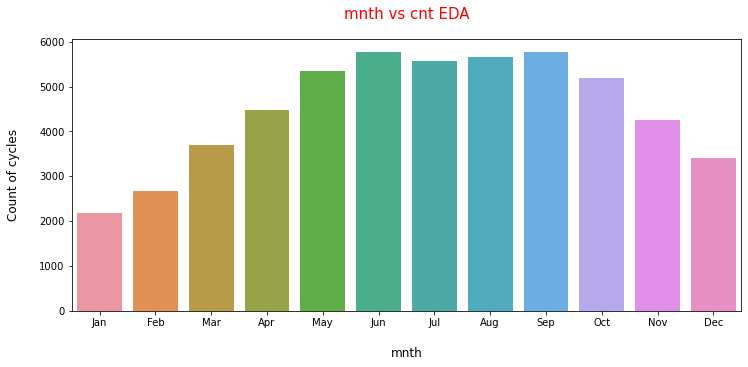

In [17]:
# starting with mnth vs cnt
plt.figure(figsize=[12,5])
sns.barplot(x = cycle["mnth"], y = cycle["cnt"], ci=None)
plt.title("mnth vs cnt EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nmnth", size = 12, color = "black")
plt.ylabel("Count of cycles\n", size = 12, color = "black")
plt.show()

The demand trend aligns with season vs cnt observation. Demands are higher between May to Oct.

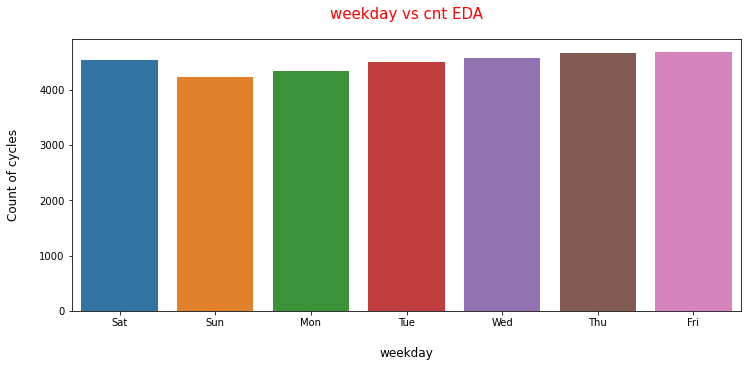

In [18]:
# weekday vs cnt
plt.figure(figsize=[12,5])
sns.barplot(x = cycle["weekday"], y = cycle["cnt"], ci=None)
plt.title("weekday vs cnt EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nweekday", size = 12, color = "black")
plt.ylabel("Count of cycles\n", size = 12, color = "black")
plt.show()

No major observation. So the demand doesn't vary based on the days.

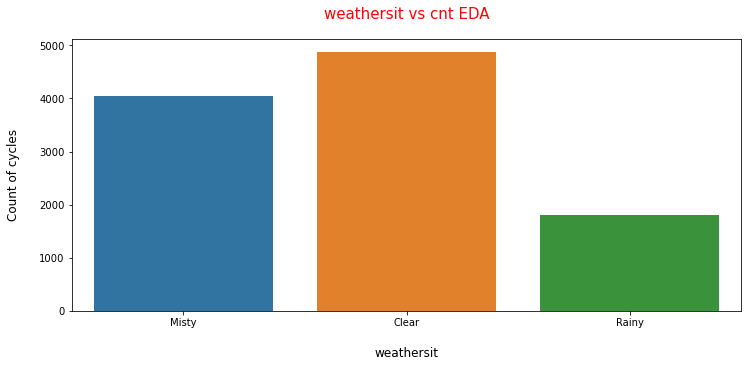

In [19]:
# weathersit vs cnt
plt.figure(figsize=[12,5])
sns.barplot(x = cycle["weathersit"], y = cycle["cnt"], ci=None)
plt.title("weathersit vs cnt EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nweathersit", size = 12, color = "black")
plt.ylabel("Count of cycles\n", size = 12, color = "black")
plt.show()

By looking at the bar plot, we can conclude that people don't prefer to buy during Rainy season

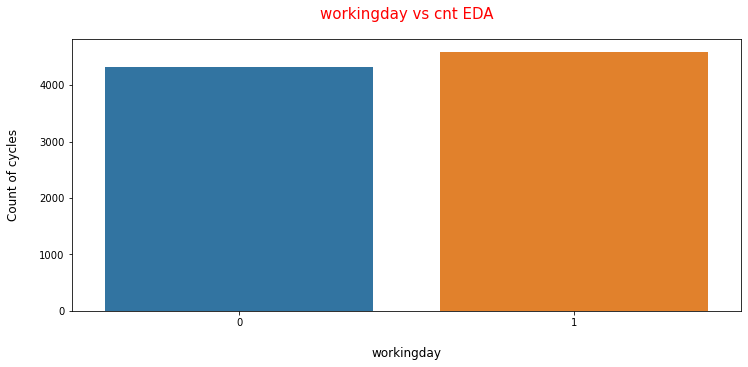

In [20]:
## Lets do EDA on numeric .
plt.figure(figsize=[12,5])
sns.barplot(x = cycle["workingday"], y = cycle["cnt"], ci=None)
plt.title("workingday vs cnt EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nworkingday", size = 12, color = "black")
plt.ylabel("Count of cycles\n", size = 12, color = "black")
plt.show()


Same observation as weekday vs cnt. No major impact based on the days of the week

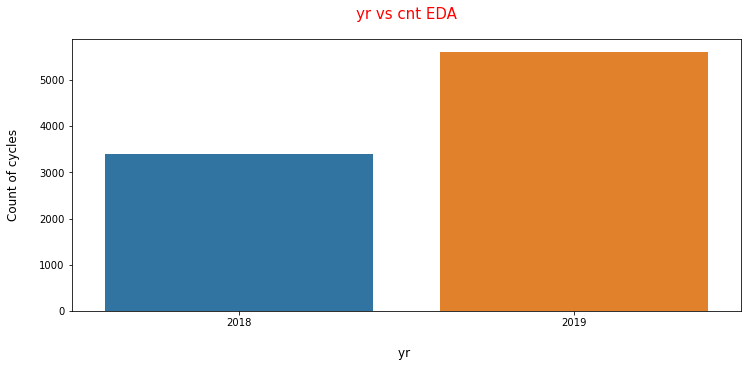

In [21]:
plt.figure(figsize=[12,5])
sns.barplot(x = cycle["yr"], y = cycle["cnt"], ci=None)
plt.title("yr vs cnt EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nyr ", size = 12, color = "black")
plt.ylabel("Count of cycles\n", size = 12, color = "black")
yeartup = ['2018', '2019']
plt.xticks([0, 1] , yeartup)
plt.show()

Demand is way higher in 2019 when compared to 2018. So it is a positive trend.

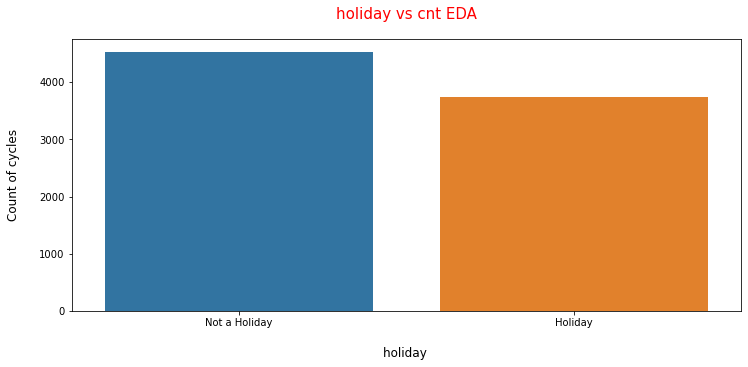

In [22]:
plt.figure(figsize=[12,5])
sns.barplot(x = cycle["holiday"], y = cycle["cnt"], ci=None)
plt.title("holiday vs cnt EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nholiday ", size = 12, color = "black")
plt.ylabel("Count of cycles\n", size = 12, color = "black")
DayType = ['Not a Holiday','Holiday']
plt.xticks([0, 1] , DayType)
plt.show()

### Demand is higher during working day.

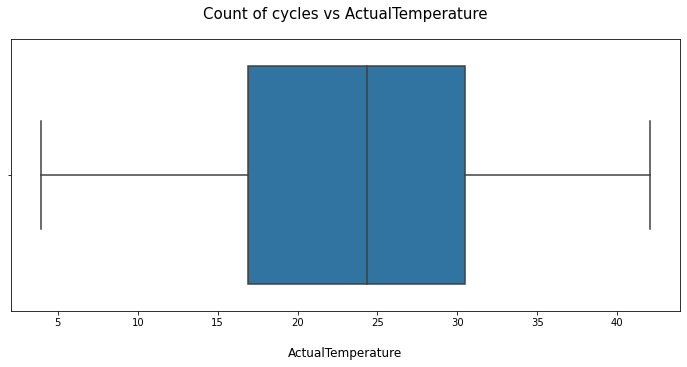

In [24]:
# Identify the outliers. We need to remove the outliers to get more accurate results.
# Lets start with atemp
plt.figure(figsize=[12,5])
sns.boxplot(x = cycle["atemp"])
plt.title("Count of cycles vs ActualTemperature", size = 15, color = "black", pad = 20)
plt.xlabel("\nActualTemperature", size = 12, color = "black")
plt.show()

No outliers seen

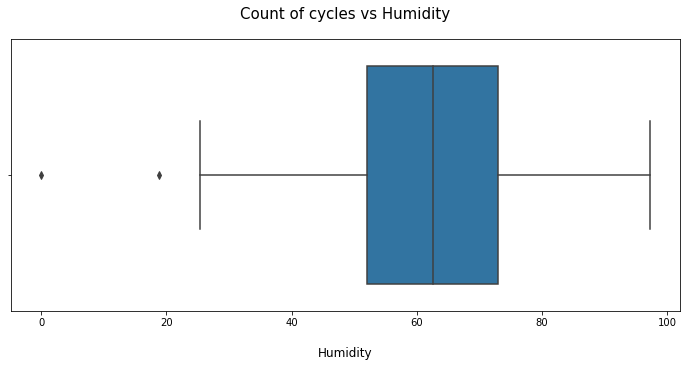

In [25]:
plt.figure(figsize=[12,5])
sns.boxplot(x = cycle["hum"])
plt.title("Count of cycles vs Humidity", size = 15, color = "black", pad = 20)
plt.xlabel("\nHumidity", size = 12, color = "black")
plt.show()

We see outliers. let us remove that using 3-sigma rule.

In [26]:
mean = np.mean(cycle["hum"])
sigma = np.std(cycle["hum"])
print("Mean: {:.2f}".format(mean))
print("Standard Deviation: {:.2f}".format(sigma))

Mean: 62.77
Standard Deviation: 14.23


In [27]:
# get the lower and upper range. 
lower_range = mean-(3*sigma)
upper_range = mean+(3*sigma)
print("Good data range {:.2f} and {:.2f}".format(lower_range, upper_range))

Good data range 20.08 and 105.45


In [28]:
# Remove all the records with humidity value >= upper range
cycle = cycle[cycle["hum"] >= 20.08]

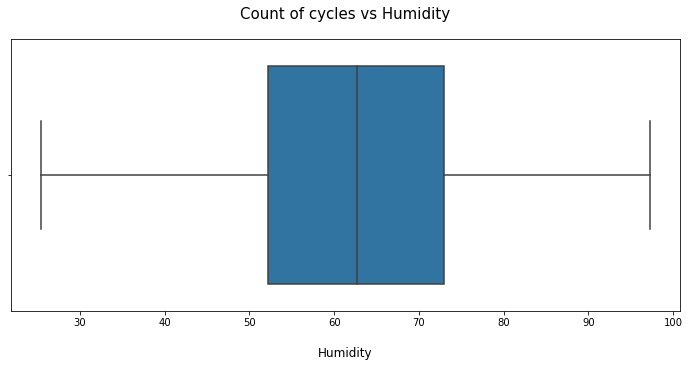

In [29]:
plt.figure(figsize=[12,5])
sns.boxplot(x = cycle["hum"])
plt.title("Count of cycles vs Humidity", size = 15, color = "black", pad = 20)
plt.xlabel("\nHumidity", size = 12, color = "black")
plt.show()

No ouliers are seen after applying 3-sigma rules.
Let's do the same for other variables too.

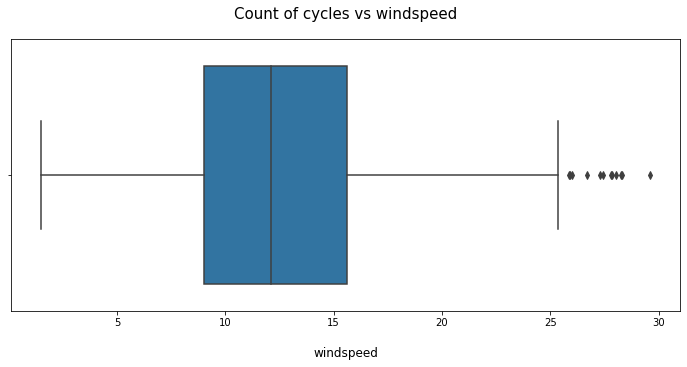

In [30]:
# cnt vs windspeed
plt.figure(figsize=[12,5])
sns.boxplot(x = cycle["windspeed"])
plt.title("Count of cycles vs windspeed", size = 15, color = "black", pad = 20)
plt.xlabel("\nwindspeed", size = 12, color = "black")
plt.show()

Remove outliers. Use 3 sigma rule

In [31]:
mean = np.mean(cycle["windspeed"])
sigma = np.std(cycle["windspeed"])
print("Mean: {:.2f}".format(mean))
print("Standard Deviation: {:.2f}".format(sigma))

Mean: 12.73
Standard Deviation: 5.14


In [32]:
cycle["windspeed"].describe()

count    728.000000
mean      12.727880
std        5.139840
min        1.500244
25%        9.031466
50%       12.125057
75%       15.624735
max       29.584721
Name: windspeed, dtype: float64

In [33]:
lower_range = mean-(3*sigma)
upper_range = mean+(3*sigma)
print("Good data range {:.2f} and {:.2f}".format(lower_range, upper_range))

Good data range -2.68 and 28.14


In [34]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      728 non-null    object 
 1   yr          728 non-null    int64  
 2   mnth        728 non-null    object 
 3   holiday     728 non-null    int64  
 4   weekday     728 non-null    object 
 5   workingday  728 non-null    int64  
 6   weathersit  728 non-null    object 
 7   atemp       728 non-null    float64
 8   hum         728 non-null    float64
 9   windspeed   728 non-null    float64
 10  cnt         728 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 68.2+ KB


In [35]:
# Remove records with windspeed > 28.14
cycle = cycle[cycle["windspeed"] <= 28.14]

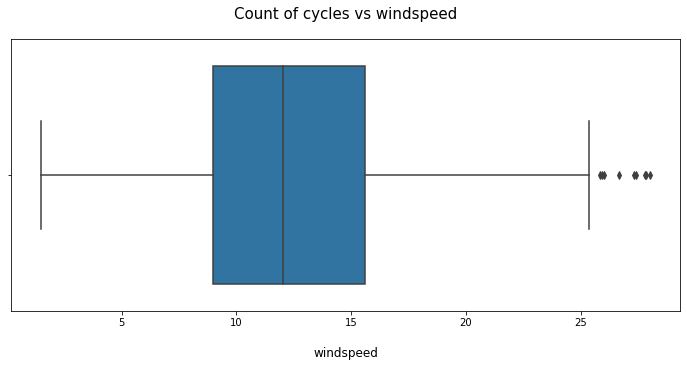

In [36]:
plt.figure(figsize=[12,5])
sns.boxplot(x = cycle["windspeed"])
plt.title("Count of cycles vs windspeed", size = 15, color = "black", pad = 20)
plt.xlabel("\nwindspeed", size = 12, color = "black")
plt.show()

In [37]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      725 non-null    object 
 1   yr          725 non-null    int64  
 2   mnth        725 non-null    object 
 3   holiday     725 non-null    int64  
 4   weekday     725 non-null    object 
 5   workingday  725 non-null    int64  
 6   weathersit  725 non-null    object 
 7   atemp       725 non-null    float64
 8   hum         725 non-null    float64
 9   windspeed   725 non-null    float64
 10  cnt         725 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 68.0+ KB


In [38]:
# Lets create Dummy variable for categorical varible
# Lets start with weekday
dummy = pd.get_dummies(cycle["weekday"], drop_first = True)
cycle = pd.concat([cycle, dummy], axis = 1)
cycle.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,Misty,18.18125,80.5833,10.749882,985,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Misty,17.68695,69.6087,16.652113,801,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1


In [39]:
# Lets do it for mnth
dummy = pd.get_dummies(cycle["mnth"], drop_first = True)
cycle = pd.concat([cycle, dummy], axis = 1)
cycle.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Misty,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Misty,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [40]:
# Lets do it for season

dummy = pd.get_dummies(cycle["season"], drop_first = True)
cycle = pd.concat([cycle, dummy], axis = 1)
cycle.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Jul,Jun,Mar,May,Nov,Oct,Sep,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Misty,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,1,0,0
1,spring,0,Jan,0,Sun,0,Misty,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Lets do it for weathersit
dummy = pd.get_dummies(cycle["weathersit"], drop_first = True)
cycle = pd.concat([cycle, dummy], axis = 1)
cycle.drop(columns = ["mnth" , "season" , "weekday" , "weathersit"], axis = 1, inplace = True)
cycle.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Mon,Sat,Sun,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,Misty,Rainy
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
# Lets look at the datatype after dummy creation
cycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          725 non-null    int64  
 1   holiday     725 non-null    int64  
 2   workingday  725 non-null    int64  
 3   atemp       725 non-null    float64
 4   hum         725 non-null    float64
 5   windspeed   725 non-null    float64
 6   cnt         725 non-null    int64  
 7   Mon         725 non-null    uint8  
 8   Sat         725 non-null    uint8  
 9   Sun         725 non-null    uint8  
 10  Thu         725 non-null    uint8  
 11  Tue         725 non-null    uint8  
 12  Wed         725 non-null    uint8  
 13  Aug         725 non-null    uint8  
 14  Dec         725 non-null    uint8  
 15  Feb         725 non-null    uint8  
 16  Jan         725 non-null    uint8  
 17  Jul         725 non-null    uint8  
 18  Jun         725 non-null    uint8  
 19  Mar         725 non-null    u

## Splitting the Data into Training and Testing Sets ##

Lets prepare the train and test sets. This will be used for predicting
First step is to re-scaling the train data. Lets use MinMaxScaler 

In [43]:
# Splitting the Data into Training and Testing Sets
np.random.seed(0)
cycle_train, cycle_test = train_test_split(cycle, train_size = 0.7, test_size = 0.3, random_state = 100)


In [44]:
scaler = MinMaxScaler()

In [45]:
num_vars = ['atemp', 'hum', 'cnt', 'windspeed']

cycle_train[num_vars] = scaler.fit_transform(cycle_train[num_vars])

In [46]:
cycle_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Mon,Sat,Sun,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,Misty,Rainy
642,1,0,1,0.670569,0.519721,0.171647,0.932633,0,0,0,...,0,0,0,1,0,0,0,1,0,0
728,1,0,0,0.204242,0.319025,0.826667,0.164795,0,0,1,...,0,0,0,0,0,1,0,0,0,0
479,1,0,1,0.523547,0.241879,0.204993,0.696004,0,0,0,...,0,0,0,0,0,0,1,0,0,0
113,0,0,0,0.632534,0.774941,0.401664,0.453942,0,0,1,...,0,0,0,0,0,0,1,0,1,0
685,1,0,0,0.330942,0.405453,0.368308,0.627550,0,1,0,...,0,0,1,0,0,0,0,1,0,0


All the variables in the train set are scaled now.

In [47]:
cycle_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Mon,Sat,Sun,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,Misty,Rainy
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.506903,0.031558,0.658777,0.523087,0.526962,0.394869,0.492324,0.151874,0.161736,0.147929,...,0.090730,0.088757,0.096647,0.076923,0.086785,0.244576,0.242604,0.254438,0.349112,0.025641
std,0.500446,0.174993,0.474588,0.215599,0.196307,0.200075,0.236431,0.359253,0.368572,0.355380,...,0.287508,0.284674,0.295768,0.266733,0.281798,0.430260,0.429081,0.435975,0.477160,0.158218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336849,0.374129,0.249140,0.325546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530310,0.524361,0.378337,0.492334,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.705624,0.668503,0.508319,0.676989,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


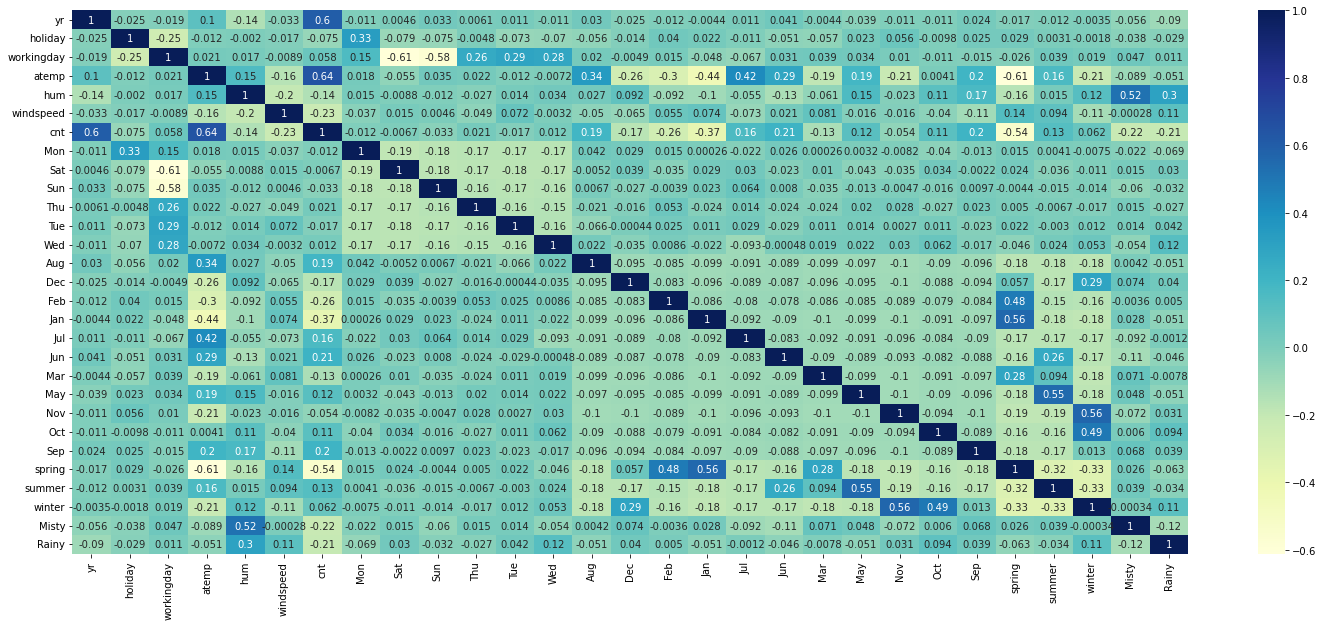

In [48]:
# Lets use this pair-plot as reference to cross check the correlation with VIF.
plt.figure(figsize = (25, 10))
sns.heatmap(cycle_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [49]:
cycle_train.shape , cycle_test.shape

((507, 29), (218, 29))

In [50]:
# Get the dependent and independent variable from train set
y_train = cycle_train.pop('cnt')
X_train = cycle_train

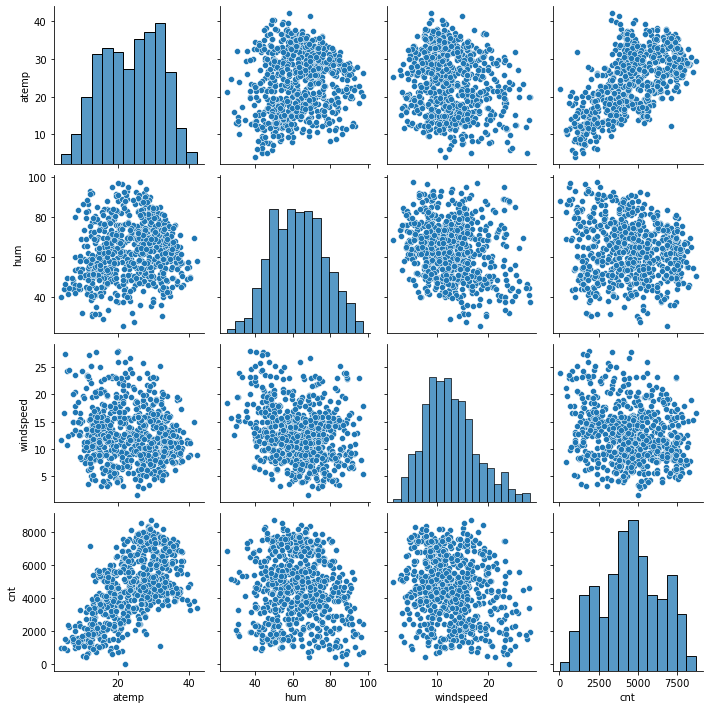

In [93]:
sns.pairplot(cycle[['atemp','hum','windspeed','cnt']])
plt.show()

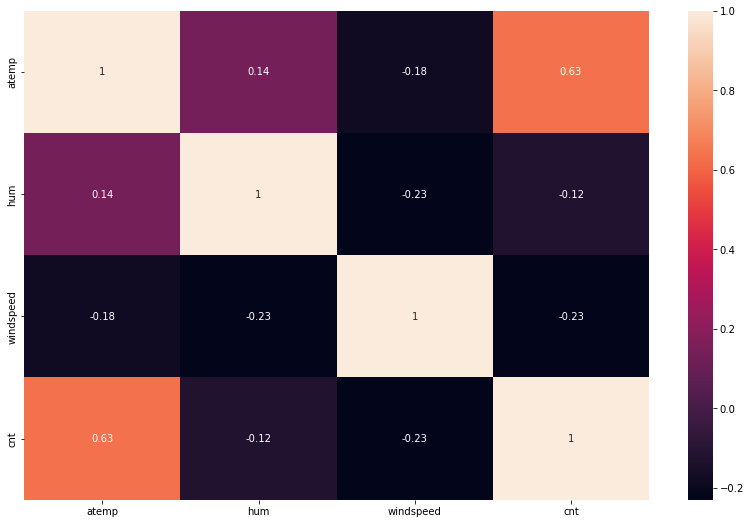

In [94]:
corr_df= cycle[['atemp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

## Building our model ##

In [51]:
# Building a linear model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

**Recursive feature elimination using SciKit Learn**

In [52]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
# based on the RFE algorithm lets get the variables marked as False and the one that can be discarded.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 7),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 10),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('Misty', True, 1),
 ('Rainy', True, 1)]

In [54]:
col = X_train.columns[rfe.support_]
# Derived from RFE
col

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'Sat', 'Dec', 'Jan',
       'Jul', 'Nov', 'Sep', 'spring', 'winter', 'Misty', 'Rainy'],
      dtype='object')

In [55]:
# Discarded variable.
X_train.columns[~rfe.support_]

Index(['holiday', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Feb', 'Jun',
       'Mar', 'May', 'Oct', 'summer'],
      dtype='object')

In [56]:
# Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[col]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 642 to 525
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          507 non-null    int64  
 1   workingday  507 non-null    int64  
 2   atemp       507 non-null    float64
 3   hum         507 non-null    float64
 4   windspeed   507 non-null    float64
 5   Sat         507 non-null    uint8  
 6   Dec         507 non-null    uint8  
 7   Jan         507 non-null    uint8  
 8   Jul         507 non-null    uint8  
 9   Nov         507 non-null    uint8  
 10  Sep         507 non-null    uint8  
 11  spring      507 non-null    uint8  
 12  winter      507 non-null    uint8  
 13  Misty       507 non-null    uint8  
 14  Rainy       507 non-null    uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 28.7 KB


## Building model using statsmodel, for the detailed statistics ##

Intention is to reduce the number of variables to below 10. It will help us to exlpain the trend better.

In [57]:
# use statsmodels for that
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
lr_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [59]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.10e-192
Time:                        14:56:44   Log-Likelihood:                 495.25
No. Observations:                 507   AIC:                            -958.5
Df Residuals:                     491   BIC:                            -890.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2552      0.030      8.640      0.0

In [60]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.52
2,atemp,14.26
4,windspeed,4.39
1,workingday,4.26
12,winter,2.85
11,spring,2.73
13,Misty,2.69
0,yr,2.12
9,Nov,1.94
5,Sat,1.77


**VIF for hum is quite high, let's remove it**

In [62]:
# Dropping high VIF column
X_train_new = X_train_rfe.drop('hum', 1,)
# adding constant new data set. 'hum' is removed.
X_train_rfe = sm.add_constant(X_train_new)

In [63]:
lr_2 = sm.OLS(y_train,X_train_rfe).fit() 

In [64]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.87e-188
Time:                        14:56:44   Log-Likelihood:                 482.80
No. Observations:                 507   AIC:                            -935.6
Df Residuals:                     492   BIC:                            -872.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2032      0.028      7.186      0.0

In [65]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.71
3,windspeed,4.34
1,workingday,4.25
11,winter,2.70
10,spring,2.42
0,yr,2.08
8,Nov,1.91
4,Sat,1.77
6,Jan,1.67
12,Misty,1.58


**Even though atemp has higher VIF, we need to consider that temprature can be the major variable affecting cnt based on the domain knowledge**

In [67]:
# Lets remove Months as season and temprature can replace them. 
X_train_new = X_train_rfe.drop('Sep', 1,)
X_train_rfe = sm.add_constant(X_train_new)

In [68]:
lr_3 = sm.OLS(y_train, X_train_rfe).fit()

In [69]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.41e-187
Time:                        14:56:45   Log-Likelihood:                 478.58
No. Observations:                 507   AIC:                            -929.2
Df Residuals:                     493   BIC:                            -870.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2047      0.028      7.185      0.0

In [70]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.32
3,windspeed,4.31
1,workingday,4.24
10,winter,2.68
9,spring,2.41
0,yr,2.08
8,Nov,1.88
4,Sat,1.77
6,Jan,1.67
11,Misty,1.57


In [72]:
X_train_new = X_train_rfe.drop('Jan', 1,)
X_train_rfe = sm.add_constant(X_train_new)

In [73]:
lr_4 = sm.OLS(y_train, X_train_rfe).fit()

In [74]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.44e-187
Time:                        14:56:45   Log-Likelihood:                 474.62
No. Observations:                 507   AIC:                            -923.2
Df Residuals:                     494   BIC:                            -868.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1874      0.028      6.695      0.0

In [75]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.23
3,windspeed,4.29
1,workingday,4.24
9,winter,2.66
0,yr,2.08
7,Nov,1.87
8,spring,1.82
4,Sat,1.76
10,Misty,1.56
5,Dec,1.42


In [76]:
X_train_new = X_train_rfe.drop('Dec', 1,)
X_train_rfe = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     224.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.55e-184
Time:                        14:56:45   Log-Likelihood:                 466.31
No. Observations:                 507   AIC:                            -908.6
Df Residuals:                     495   BIC:                            -857.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.028      5.973      0.0

In [77]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.16
3,windspeed,4.29
1,workingday,4.22
8,winter,2.11
0,yr,2.08
7,spring,1.79
4,Sat,1.75
6,Nov,1.65
9,Misty,1.56
5,Jul,1.33


In [78]:
X_train_new = X_train_rfe.drop('Nov', 1,)
X_train_rfe = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     240.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.21e-183
Time:                        14:56:45   Log-Likelihood:                 460.34
No. Observations:                 507   AIC:                            -898.7
Df Residuals:                     496   BIC:                            -852.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1515      0.028      5.432      0.0

In [79]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.09
3,windspeed,4.23
1,workingday,4.21
0,yr,2.08
6,spring,1.79
4,Sat,1.75
8,Misty,1.55
7,winter,1.48
5,Jul,1.33
9,Rainy,1.09


In [80]:
X_train_new = X_train_rfe.drop('Jul', 1,)
X_train_rfe = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     257.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          9.96e-181
Time:                        14:56:45   Log-Likelihood:                 451.58
No. Observations:                 507   AIC:                            -883.2
Df Residuals:                     497   BIC:                            -840.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1671      0.028      5.946      0.0

In [81]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.17
3,windspeed,4.20
1,workingday,4.16
0,yr,2.07
5,spring,1.79
4,Sat,1.75
7,Misty,1.54
6,winter,1.46
8,Rainy,1.08


Text(0.5, 0, 'Errors')

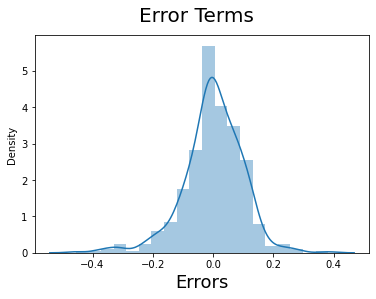

In [82]:
# Plot the histogram of the error terms
y_train_pred = lr_7.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

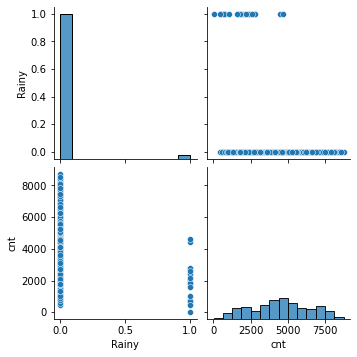

In [96]:
sns.pairplot(cycle[['Rainy','cnt']])
plt.show()

## Making Predictions ##

In [83]:
# Let's scale the test variable
num_vars = ['atemp', 'hum', 'cnt', 'windspeed']

cycle_test[num_vars] = scaler.transform(cycle_test[num_vars])

In [84]:
cycle_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Mon,Sat,Sun,...,Mar,May,Nov,Oct,Sep,spring,summer,winter,Misty,Rainy
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.486239,0.022936,0.743119,0.545490,0.512211,0.389003,0.496373,0.12844,0.096330,0.137615,...,0.064220,0.077982,0.050459,0.100917,0.073394,0.238532,0.279817,0.220183,0.316514,0.032110
std,0.500961,0.150043,0.437919,0.224852,0.190215,0.206324,0.226559,0.33535,0.295723,0.345288,...,0.245709,0.268760,0.219393,0.301913,0.261383,0.427167,0.449942,0.415324,0.466186,0.176698
min,0.000000,0.000000,0.000000,0.026455,0.030161,-0.053367,-0.049378,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.365473,0.364559,0.243305,0.337740,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575514,0.513341,0.349135,0.505191,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743429,0.652294,0.511217,0.653266,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.019437,0.954151,1.006644,0.961487,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X_test and y_test**

In [85]:
y_test = cycle_test.pop('cnt')
X_test = cycle_test

In [86]:
X_test_new = X_test[X_train_new.columns]
X_test_cnst = sm.add_constant(X_test_new)

In [87]:
X_test_cnst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 241 to 362
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       218 non-null    float64
 1   yr          218 non-null    int64  
 2   workingday  218 non-null    int64  
 3   atemp       218 non-null    float64
 4   windspeed   218 non-null    float64
 5   Sat         218 non-null    uint8  
 6   spring      218 non-null    uint8  
 7   winter      218 non-null    uint8  
 8   Misty       218 non-null    uint8  
 9   Rainy       218 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


## Model Evaluation ##

**Use the last linear-regression object for predicting.**

In [88]:
y_pred = lr_7.predict(X_test_cnst)

Text(0, 0.5, 'y_pred')

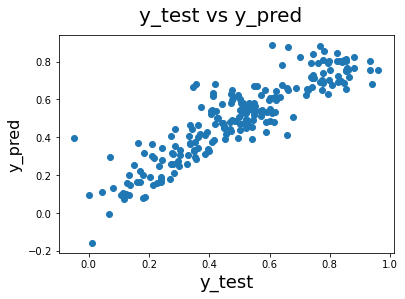

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

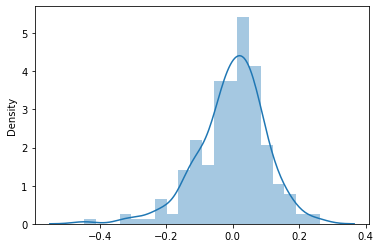

In [90]:
# Plot the histogram of the error terms
sns.distplot((y_test - y_pred))
plt.show()

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7982966753050548